In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
type(tips)

pandas.core.frame.DataFrame

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [8]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [10]:
sex_data = tips['sex']

In [11]:
sex_data

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): [Male, Female]

In [12]:
type(sex_data)

pandas.core.series.Series

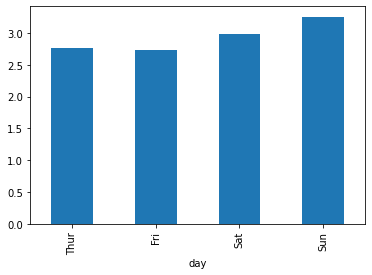

In [14]:
day_values = tips.groupby('day').mean()['tip']
day_values.plot(kind='bar')

In [18]:
tips.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

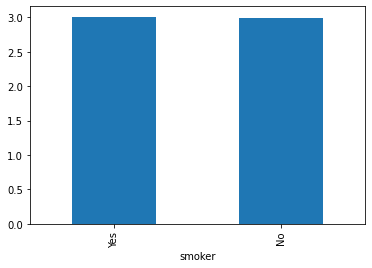

In [32]:
smoker_values = tips.groupby('smoker').mean()['tip']
smoker_values.plot(kind='bar')

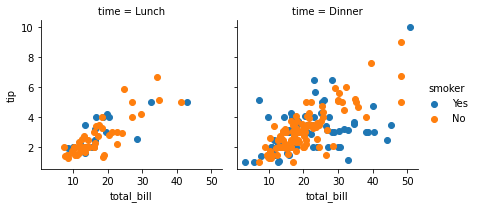

In [38]:
g = sns.FacetGrid(tips, col='time', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip')
g.add_legend()

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_encoder = LabelEncoder()

In [44]:
encoded_sex = label_encoder.fit_transform(tips['sex'])
encoded_sex

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [45]:
tips['sex'] = encoded_sex

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [48]:
tips['smoker'] = label_encoder.fit_transform(tips['smoker'])
tips['day'] = label_encoder.fit_transform(tips['day'])
tips['time'] = label_encoder.fit_transform(tips['time'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [52]:
labels = tips['day']

In [50]:
train_data = tips.drop(columns=['day'])
train_data.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,0,0,0,2
1,10.34,1.66,1,0,0,3
2,21.01,3.50,1,0,0,3
3,23.68,3.31,1,0,0,2
4,24.59,3.61,0,0,0,4


In [51]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2)

In [54]:
x_train

,total_bill,tip,sex,smoker,time,size
45,18.29,3.00,1,0,0,2
226,10.09,2.00,0,1,1,2
156,48.17,5.00,1,0,0,6
97,12.03,1.50,1,1,0,2
180,34.65,3.68,1,1,0,4
...,...,...,...,...,...,...
144,16.43,2.30,0,0,1,2
111,7.25,1.00,0,0,0,1
131,20.27,2.83,0,0,1,2
32,15.06,3.00,0,0,0,2


In [56]:
y_train

45     2
226    0
156    2
97     0
180    2
      ..
144    3
111    1
131    3
32     1
147    3
Name: day, Length: 195, dtype: int64

In [57]:
from sklearn.neural_network import MLPClassifier

In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(100))

In [68]:
mlp.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [69]:
predictions = mlp.predict(x_test)

In [70]:
predictions

array([3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 2,
       2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 3, 2, 3, 3, 2, 1, 1, 2, 1, 1, 3, 2,
       3, 2, 1, 3, 2])

In [64]:
y_test

193    3
99     0
151    2
231    1
207    1
153    2
160    2
103    1
141    3
19     1
238    1
196    3
25     1
92     0
173    2
114    2
242    1
23     1
118    3
27     1
230    1
212    1
110    1
3      2
146    3
152    2
175    2
217    1
162    2
214    1
243    3
215    1
127    3
157    2
88     3
224    0
2      2
55     2
189    2
63     1
208    1
187    2
143    3
228    1
221    0
211    1
181    2
135    3
237    1
Name: day, dtype: int64

In [65]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test, predictions)

0.46938775510204084

In [ ]:
MNIST